# REDES NEURAIS ARTIFICIAIS

Introdução - Instalando Bibliotecas

In [1]:
# Bibliotecas Necessárias
# Theano
# Tensorflow
# Keras

import warnings
warnings.filterwarnings("ignore")

#### Parte 01 - PROCESSAMENTO DE DADOS

In [2]:
# Importando as Bibliotecas
# Aqui iremos fazer o import das bibliotecas que iremos usar no projeto.

# Usaremos o numpy para manipulação de arrays numéricos em Python.
import numpy as np

# Usamos o matplotlib para visualização gráfica
import matplotlib.pyplot as plt

# Usaremos o pandas para o processamento dos dados
import pandas as pd

In [3]:
# Carregando o dataset
file = 'Churn_Modelling.csv'
dataset = pd.read_csv(file)

In [4]:
# Mostrando as 5 primeiras linhas do dataset
dataset.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


##### Descrição das Variáveis:
###### CreditScore: Pontuação de Crédito
###### Geography: País de Residência do Cliente (Será convertido em variável numérica)
###### Gender: Gênero - Masculino ou Feminino (Será convertido em variável numérica)
###### Age: Idade
###### Tenure: Tempo de Relacionamento com o Banco
###### Balance: Saldo em Conta
###### NumOfProducts: Número de Produtos que o cliente tem
###### HasCrCard: Se possui cartão de crédito. 1 - Sim, 0 - Não
###### IsActiveMember: É um Membro Ativo: 1 - Sim, 0 - Não
###### EstimatedSalary: Salário Estimado
###### Exited: Saiu.  1 - Sim, 0 - Não

In [5]:
# Divisão do Dataset em Variáveis Independentes e Variáveis Dependentes
# Variáveis Independentes - Features ou Inputs
# Variáveis Dependentes - Classe de Saída ou Output
X = dataset.iloc[:, 3:13].values
y = dataset.iloc[:, 13].values

In [6]:
X_df = pd.DataFrame(X)
X_df.head()

,0,1,2,3,4,5,6,7,8,9
0,619,France,Female,42,2,0,1,1,1,101349
1,608,Spain,Female,41,1,83807.9,1,0,1,112543
2,502,France,Female,42,8,159661,3,1,0,113932
3,699,France,Female,39,1,0,2,0,0,93826.6
4,850,Spain,Female,43,2,125511,1,1,1,79084.1


In [7]:
y_df = pd.DataFrame(y)
y_df.head()

,0
0,1
1,0
2,1
3,0
4,0


In [8]:
# Codificando Dados Categoricos
# Codificando Variáveis Independentes

# Importando biblioteca para Preprocessamento de Dados
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [9]:
# Codificando a Variável Independente Pais, de Categorica para Binária.
# Serão acrescentadas mais 2 colunas no dataset, ficando assim 3 colunas para representar o pais.
# Sera um array de 3 posições.
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])

In [10]:
# Codificando a Variável Independente Genero, de Categorica para Binária.
# Neste caso, os 2 valores categóricos, serão transformados em 2 valores binários.
# Male será convertido para 1
# Female será convertido para 0
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])

In [11]:
onehotencoder = OneHotEncoder(categorical_features = [1])
X = onehotencoder.fit_transform(X).toarray()
X = X[:, 1:]

In [12]:
df = pd.DataFrame(X)

In [13]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.0,0.0,619.0,0.0,42.0,2.0,0.00,1.0,1.0,1.0,101348.88
1,0.0,1.0,608.0,0.0,41.0,1.0,83807.86,1.0,0.0,1.0,112542.58
2,0.0,0.0,502.0,0.0,42.0,8.0,159660.80,3.0,1.0,0.0,113931.57
3,0.0,0.0,699.0,0.0,39.0,1.0,0.00,2.0,0.0,0.0,93826.63
4,0.0,1.0,850.0,0.0,43.0,2.0,125510.82,1.0,1.0,1.0,79084.10


In [14]:
# Dividindo o dataset em Conjunto de Treinamento e Conjunto de Dados
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [15]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [16]:
teste = pd.DataFrame(X_train)
teste.head()

,0,1,2,3,4,5,6,7,8,9,10
0,-0.569844,1.743090,0.169582,-1.091687,-0.464608,0.006661,-1.215717,0.809503,0.642595,-1.032270,1.106432
1,1.754865,-0.573694,-2.304559,0.916013,0.301026,-1.377440,-0.006312,-0.921591,0.642595,0.968738,-0.748664
2,-0.569844,-0.573694,-1.191196,-1.091687,-0.943129,-1.031415,0.579935,-0.921591,0.642595,-1.032270,1.485335
3,-0.569844,1.743090,0.035566,0.916013,0.109617,0.006661,0.473128,-0.921591,0.642595,-1.032270,1.276528
4,-0.569844,1.743090,2.056114,-1.091687,1.736588,1.044737,0.810193,0.809503,0.642595,0.968738,0.558378


#### Parte 02 - CONSTRUINDO A REDE NEURAL ARTIFICIAL

#### Importando a Biblioteca Keras e os Pacotes

In [17]:
import keras

# Para inicializar nossa Rede Neural Artificial
from keras.models import Sequential

# Para criar as camadas da nossa Rede Neural Artificial
from keras.layers import Dense

Using TensorFlow backend.


#### Inicializando a Rede Neural Artificial

In [18]:
# Inicializamos nossa Rede Neural Artificial ao criar um objeto do Tipo Sequential
classifier = Sequential()

#### Adicionando a Camada de Entrada (Input Layer) e a primeira Camada Oculta (Hidden Layer)

In [19]:
# PARÂMETROS
# Usamos o método add do nosso objeto classifier
# output_dim = Número de nós na camada oculta
# init = Método de Inicialização
# activation = Função de Ativação
# input_dim = Tamanho do Input
firstLayer = Dense(output_dim = 6, kernel_initializer = 'uniform', activation = 'relu', input_dim = 11)
classifier.add(firstLayer)

#### Adicionando a Segunda Camada Oculta (Hidden Layer)

In [20]:
secondLayer = Dense(output_dim = 6, kernel_initializer = 'uniform', activation = 'relu')
classifier.add(secondLayer)

#### Adicionando a Camada de Saida (Output Layer)

In [21]:
outputLayer = Dense(output_dim = 1, kernel_initializer = 'uniform', activation = 'sigmoid')
classifier.add(outputLayer)

#### Compilando nossa Rede Neural Artificial

In [22]:
# PARAMETROS
# optmizer = Algoritmo que será utilizado para encontrar o melhor conjunto de pesos na Rede Neural
optimizer = 'adam'
# loss = Algoritmo que irá calcular a perda, ou seja a diferença entre o valor predito e o valor real.
loss = 'binary_crossentropy'
# metrics = Tipo de Métrica Utilizada para medir o desempenho da Rede
metrics = ['accuracy']

classifier.compile(optimizer, loss, metrics)

#### Treinando a Rede Neural Artificial com o Conjunto de Treino

In [23]:
trainingInputs = X_train
trainingOutputs = y_train
batch_size = 10
epochs = 20
classifier.fit(trainingInputs, trainingOutputs, batch_size, epochs)

Epoch 1/20
8000/8000 [==============================] - 2s 233us/step - loss: 0.5056 - acc: 0.7952
Epoch 2/20
8000/8000 [==============================] - 2s 218us/step - loss: 0.4317 - acc: 0.7960
Epoch 3/20
8000/8000 [==============================] - 2s 190us/step - loss: 0.4294 - acc: 0.7960
Epoch 4/20
8000/8000 [==============================] - 1s 182us/step - loss: 0.4275 - acc: 0.7960
Epoch 5/20
8000/8000 [==============================] - 1s 180us/step - loss: 0.4246 - acc: 0.7960
Epoch 6/20
8000/8000 [==============================] - 1s 183us/step - loss: 0.4212 - acc: 0.8054
Epoch 7/20
8000/8000 [==============================] - 2s 189us/step - loss: 0.4181 - acc: 0.8222
Epoch 8/20
8000/8000 [==============================] - 2s 194us/step - loss: 0.4161 - acc: 0.8271
Epoch 9/20
8000/8000 [==============================] - 1s 187us/step - loss: 0.4144 - acc: 0.8309
Epoch 10/20
8000/8000 [==============================] - 2s 197us/step - loss: 0.4128 - acc: 0.8296
Epoch 11/

#### Parte 03 - FAZENDO PREDIÇÕES E AVALIANDO O MODELO

In [24]:
# Testando nosso modelo no conjunto de teste
y_pred = classifier.predict(X_test)

In [25]:
# Convertendo o array com as probabilidades em um Data Frame
df_y_pred = pd.DataFrame(y_pred)

# Mostrando as 5 primeiras linhas
df_y_pred.head()

,0
0,0.240811
1,0.331014
2,0.174675
3,0.074954
4,0.179200


In [26]:
y_pred_Boolean = (y_pred > 0.5)
df_y_pred_Boolean = pd.DataFrame(y_pred_Boolean)
df_y_pred_Boolean.head()

,0
0,False
1,False
2,False
3,False
4,False


In [27]:
# Criando nossa Matriz de Confusão
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_Boolean)

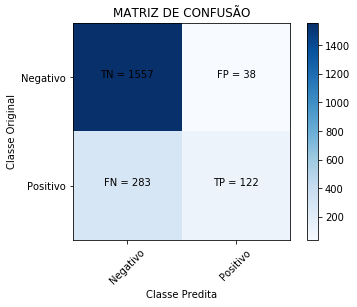

In [28]:
plt.clf()
plt.imshow(cm, interpolation = 'nearest', cmap = plt.cm.Blues)
classNames = ['Negativo', 'Positivo']
plt.title('MATRIZ DE CONFUSÃO')
plt.ylabel('Classe Original')
plt.xlabel('Classe Predita')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames, rotation = 45)
plt.yticks(tick_marks, classNames)
s = [['TN', 'FP'], ['FN', 'TP']]
plt.colorbar()
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+' = '+str(cm[i][j]), horizontalalignment = 'center')
plt.show()

In [29]:
(cm[0][0] + cm[1][1]) / 2000

0.8395

#### Parte 04 - VALIDANDO O MODELO

##### Dado determinado cliente, com as caracteristicas abaixo, iremos utilizar nossa rede para verificar se o cliente irá sair ou não

In [37]:
# DADOS SOBRE PAIS:
# ## FRANÇA: 0, 0
# ## ESPANHA: 0, 1
# ## ALEMANHA: 1, 0

Pais0 = 0.0
Pais1 = 0.0
ScoreCredito = 200
Genero = 1
Idade = 60
Relacionamento = 0
Saldo = 1000
QtdProdutos = 0
CartaoCredito = 0
Ativo = 0
Salario = 10000
data = sc.transform(np.array([[Pais0, Pais1, ScoreCredito, Genero, Idade, Relacionamento, Saldo, QtdProdutos, CartaoCredito, Ativo, Salario]]))

new_prediction = classifier.predict(data)
new_prediction_tf = (new_prediction > 0.5)

valor = 'Sim' if (new_prediction > 0.5) else 'Não'
    
print('Cliente Irá Sair ?', valor)
print('Qual a Probabilidade do Cliente Sair: ', '%.4f' % new_prediction)

Cliente Irá Sair ? Sim
Qual a Probabilidade do Cliente Sair:  0.6999
